In [9]:
from mpl_toolkits import mplot3d
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import read_camera
import transform
import pprint
from matplotlib.tri import Triangulation

## Endoscope Calibration (1)

In [10]:
raw_points = list(read_camera.load_all('calibration/endoscope_chesspts.p'))
endoscope_points = np.matrix(raw_points[0])
pprint.pprint(endoscope_points)


matrix([[-0.04338947, -0.02332591,  0.15220529],
        [-0.0311438 , -0.02236755,  0.15220529],
        [-0.01925599, -0.02179035,  0.15525671],
        [-0.00678613, -0.02060439,  0.15281767],
        [ 0.00542535, -0.02026216,  0.15764119],
        [-0.04428951, -0.0119729 ,  0.14961027],
        [-0.03194188, -0.01099711,  0.14962554],
        [-0.01951993, -0.01012479,  0.14962554],
        [-0.00750433, -0.00948297,  0.15220529],
        [ 0.00481658, -0.00883419,  0.15578659],
        [-0.04463047, -0.00027559,  0.14471978],
        [-0.03252353,  0.00050339,  0.14551495],
        [-0.02036119,  0.00126384,  0.14713178],
        [-0.00837491,  0.00218516,  0.15092675],
        [ 0.00431982,  0.00291916,  0.15111776],
        [-0.04660133,  0.01143541,  0.14466405],
        [-0.03346503,  0.01224647,  0.14315524],
        [-0.02072193,  0.01267695,  0.14162417],
        [-0.00865397,  0.01369652,  0.14471978],
        [ 0.00383879,  0.01462265,  0.1462187 ],
        [-0.04741852

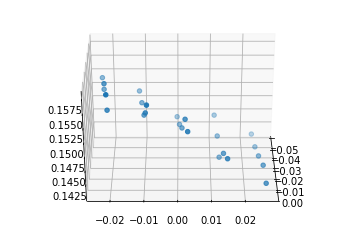

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = endoscope_points[:,0]
Y = endoscope_points[:,1]
Z = endoscope_points[:,2]
ax.scatter3D(X, Y, Z)

def rotate(angle):
    ax.view_init(azim=angle)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)


## World

In [12]:
world_pts = transform.generate_world()
pprint.pprint(world_pts)

matrix([[0.    , 0.    , 0.    ],
        [0.0125, 0.    , 0.    ],
        [0.025 , 0.    , 0.    ],
        [0.0375, 0.    , 0.    ],
        [0.05  , 0.    , 0.    ],
        [0.    , 0.0125, 0.    ],
        [0.0125, 0.0125, 0.    ],
        [0.025 , 0.0125, 0.    ],
        [0.0375, 0.0125, 0.    ],
        [0.05  , 0.0125, 0.    ],
        [0.    , 0.025 , 0.    ],
        [0.0125, 0.025 , 0.    ],
        [0.025 , 0.025 , 0.    ],
        [0.0375, 0.025 , 0.    ],
        [0.05  , 0.025 , 0.    ],
        [0.    , 0.0375, 0.    ],
        [0.0125, 0.0375, 0.    ],
        [0.025 , 0.0375, 0.    ],
        [0.0375, 0.0375, 0.    ],
        [0.05  , 0.0375, 0.    ],
        [0.    , 0.05  , 0.    ],
        [0.0125, 0.05  , 0.    ],
        [0.025 , 0.05  , 0.    ],
        [0.0375, 0.05  , 0.    ],
        [0.05  , 0.05  , 0.    ]])


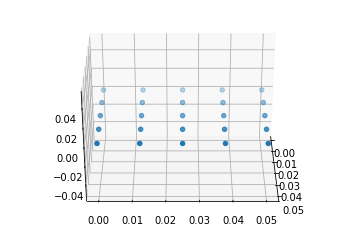

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = world_pts[:,0]
Y = world_pts[:,1]
Z = world_pts[:,2]
ax.scatter3D(X, Y, Z)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
rot_animation.save('../world.gif', dpi=80, writer='imagemagick')

## PSM2 Data

In [18]:
psm2_data = list(transform.load_all('world/psm2_recordings.txt'))
psm2_pts = transform.psm_data_to_matrix(psm2_data)
pprint.pprint(psm2_pts)

matrix([[-0.12839317,  0.0182926 , -0.12404234],
        [-0.14066646,  0.02127503, -0.12258381],
        [-0.15224858,  0.02490416, -0.12066108],
        [-0.16414693,  0.02743963, -0.11899533],
        [-0.17600679,  0.02895485, -0.11710618],
        [-0.12693588,  0.03055046, -0.12412532],
        [-0.13838708,  0.03368813, -0.12235524],
        [-0.14935576,  0.03677983, -0.12028915],
        [-0.16142685,  0.03903816, -0.11921464],
        [-0.17328404,  0.04218511, -0.11653508],
        [-0.1244054 ,  0.0429045 , -0.12425857],
        [-0.13618823,  0.04646565, -0.12156504],
        [-0.14725006,  0.0484558 , -0.12039924],
        [-0.15907493,  0.05011927, -0.11983916],
        [-0.1712751 ,  0.05343071, -0.11657239],
        [-0.12072612,  0.05546445, -0.12390448],
        [-0.13242927,  0.05855616, -0.12102449],
        [-0.14459181,  0.06101676, -0.11941653],
        [-0.1559966 ,  0.06387588, -0.11786232],
        [-0.16712889,  0.06698763, -0.116345  ],
        [-0.11883976

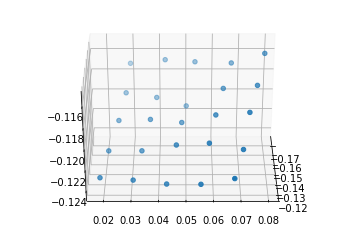

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = psm2_pts[:,0]
Y = psm2_pts[:,1]
Z = psm2_pts[:,2]
ax.scatter3D(X, Y, Z)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)

## Transformations (ENDOSCOPE & PSM2)

In [29]:
T2_E = transform.get_transform("PSM2", "Endoscope", psm2_pts, endoscope_points)
TE_2 = transform.get_transform("Endoscope", "PSM2", endoscope_points, psm2_pts)


PSM2 --> Endoscope Transformation Matrix
[[-0.95566799  0.16414534  0.24444837 -0.13960678]
 [ 0.11025786  0.96928976 -0.21981938 -0.05597686]
 [-0.27302363 -0.18312198 -0.94441751  0.00309698]]

Endoscope --> PSM2 Transformation Matrix
[[-0.95566799  0.11025786 -0.27302363 -0.12640029]
 [ 0.16414534  0.96928976 -0.18312198  0.07774072]
 [ 0.24444837 -0.21981938 -0.94441751  0.0247467 ]]


In [21]:
psm2_e = transform.transform_data("PSM2", "Endoscope", psm2_pts, T2_E, endoscope_points)
psme_2 = transform.transform_data("Endoscope", "PSM2", endoscope_points, TE_2, psm2_pts)


Transforming PSM2 --> Endoscope
[[-0.04422483 -0.02513547  0.15194933]
 [-0.03164956 -0.02391847  0.15337662]
 [-0.01951519 -0.02210047  0.15405838]
 [-0.00732094 -0.02132092  0.15526945]
 [ 0.00472366 -0.02157514  0.15644585]
 [-0.04362574 -0.01307514  0.14938514]
 [-0.03173447 -0.01168551  0.15026532]
 [-0.02023951 -0.01035231  0.15074262]
 [-0.0080702  -0.00973046  0.15260998]
 [ 0.00443291 -0.00857652  0.15274037]
 [-0.04404875 -0.0007922   0.14655781]
 [-0.0315453   0.00076835  0.14657886]
 [-0.02036221  0.00122147  0.14813355]
 [-0.00865161  0.00140695  0.15052845]
 [ 0.00434983  0.00255343  0.1501678 ]
 [-0.04541671  0.01170987  0.14291887]
 [-0.03302089  0.01278319  0.14282803]
 [-0.02060057  0.01347374  0.14417951]
 [-0.00885215  0.01464595  0.1453019 ]
 [ 0.00266832  0.01610118  0.14633847]
 [-0.04502581  0.02359952  0.13944299]
 [-0.03369542  0.02520105  0.14013475]
 [-0.02205446  0.02573655  0.14032286]
 [-0.00990863  0.02700751  0.14152903]
 [ 0.00253417  0.02803263  0.14

## PSM2 Transformed to Endoscope

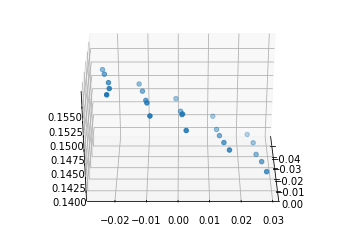

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = psm2_e[:,0]
Y = psm2_e[:,1]
Z = psm2_e[:,2]
ax.scatter3D(X, Y, Z)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)



## Endoscope Transformed to PSM2

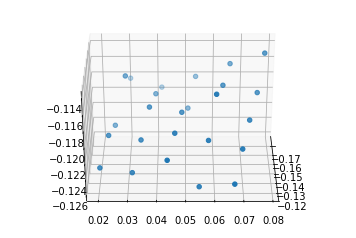

In [30]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = psme_2[:,0]
Y = psme_2[:,1]
Z = psme_2[:,2]
ax.scatter3D(X, Y, Z)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)


## Endoscope Calibration (2)

matrix([[-0.04338947, -0.02332591,  0.15220529],
        [-0.0311438 , -0.02236755,  0.15220529],
        [-0.01925599, -0.02179035,  0.15525671],
        [-0.00678613, -0.02060439,  0.15281767],
        [ 0.00542535, -0.02026216,  0.15764119],
        [-0.04428951, -0.0119729 ,  0.14961027],
        [-0.03194188, -0.01099711,  0.14962554],
        [-0.01951993, -0.01012479,  0.14962554],
        [-0.00750433, -0.00948297,  0.15220529],
        [ 0.00481658, -0.00883419,  0.15578659],
        [-0.04463047, -0.00027559,  0.14471978],
        [-0.03252353,  0.00050339,  0.14551495],
        [-0.02036119,  0.00126384,  0.14713178],
        [-0.00837491,  0.00218516,  0.15092675],
        [ 0.00431982,  0.00291916,  0.15111776],
        [-0.04660133,  0.01143541,  0.14466405],
        [-0.03346503,  0.01224647,  0.14315524],
        [-0.02072193,  0.01267695,  0.14162417],
        [-0.00865397,  0.01369652,  0.14471978],
        [ 0.00383879,  0.01462265,  0.1462187 ],
        [-0.04741852

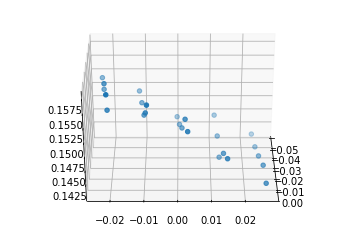

In [24]:
raw_points = list(read_camera.load_all('calibration/endoscope_chesspts.p'))
world_endo = np.matrix(raw_points[0])
pprint.pprint(world_endo)
fig = plt.figure()
ax = plt.axes(projection='3d')
X = world_endo[:,0]
Y = world_endo[:,1]
Z = world_endo[:,2]
ax.scatter3D(X, Y, Z)

def rotate(angle):
    ax.view_init(azim=angle)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
# rot_animation.save('../../world_endoscope.gif', dpi=80, writer='imagemagick')